In [0]:
#Install Tensor flow
!pip install -q tensorflow==2.0.beta1

In [0]:
import tensorflow as tf
print(tf.__version__)

2.0.0-beta1


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [0]:
# Make the Database
N=1000
X=np.random.random((N, 2))*6-3 #Uniformly Distributed between (-3, +3)
Y=np.cos(2*X[:,0])+ np.cos(3*X[:,1])

The implements the function:
            
$$ y = cos(2x_1)+cos(3x_2) $$

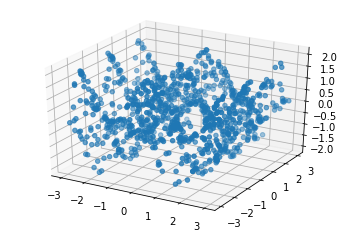

In [0]:
#plot it
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X[:,0], X[:,1], Y)
plt.show()

In [0]:
#Build the model
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(128, input_shape=(2, ), activation='relu'),
                                    tf.keras.layers.Dense(1)
])

In [0]:
#Compile & Fit
opt = tf.keras.optimizers.Adam(0.01)
model.compile(optimizer=opt, loss='mse')
r = model.fit(X, Y, epochs=100)

Train on 1000 samples
Epoch 1/100
1000/1000 [==============================] - 0s 104us/sample - loss: 0.9355
Epoch 2/100
1000/1000 [==============================] - 0s 38us/sample - loss: 0.9124
Epoch 3/100
1000/1000 [==============================] - 0s 37us/sample - loss: 0.9028
Epoch 4/100
1000/1000 [==============================] - 0s 38us/sample - loss: 0.8626
Epoch 5/100
1000/1000 [==============================] - 0s 37us/sample - loss: 0.8339
Epoch 6/100
1000/1000 [==============================] - 0s 52us/sample - loss: 0.7772
Epoch 7/100
1000/1000 [==============================] - 0s 44us/sample - loss: 0.7180
Epoch 8/100
1000/1000 [==============================] - 0s 40us/sample - loss: 0.6380
Epoch 9/100
1000/1000 [==============================] - 0s 37us/sample - loss: 0.6279
Epoch 10/100
1000/1000 [==============================] - 0s 38us/sample - loss: 0.6019
Epoch 11/100
1000/1000 [==============================] - 0s 44us/sample - loss: 0.5696
Epoch 12/100
1000/

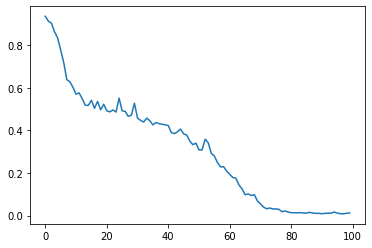

In [0]:
#Plot the loss
plt.plot(r.history['loss'], label='loss')

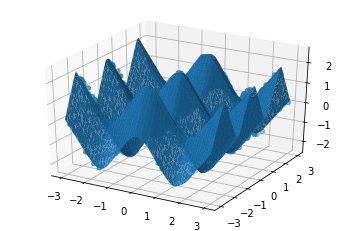

In [0]:
#Plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

#Surface plot
line=np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()


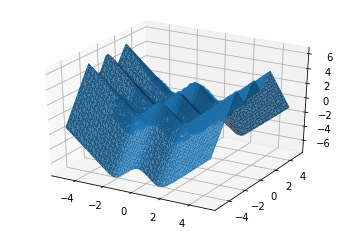

In [0]:
# Can it extrapolate?
# Plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# surface plot
line = np.linspace(-5, 5, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()